# The Quantum Computing Journey With Pennylane

## Introduction to quantum computing
Through the different tutorials in this chapter, I have learned about the notions of the fundamental blocks of quantum computers: **the qubits**
Their mathematical representation through **Linear Algebra** using the **Dirac notation**, or **bra-ket notation**. for the  state vector of a qubit  called a **ket**, and for each a ket there is an associated **bra** with it.
There is also another important notation which is the Superposition which makes the qubits so much interesting, a qubit in a superposition state is a qubit in a state in between the 2 orthonormal basis states |0> and |1>.


We measure the qubits at the end of an algorithm to extract useful information by repeating the execution of the circuits (shots) and then we have a probabilistic distribution of the possible results since the qubit collapses into one of his basis states when measuring it.

To manipulate the qubits to map them from one state to another we use Matrices

Here are the solutions of the codercices:

I.1.1

In [ ]:
# Here are the vector representations of |0> and |1>, for convenience
ket_0 = np.array([1, 0])
ket_1 = np.array([0, 1])


def normalize_state(alpha, beta):
    """Compute a normalized quantum state given arbitrary amplitudes.

    Args:
        alpha (complex): The amplitude associated with the |0> state.
        beta (complex): The amplitude associated with the |1> state.

    Returns:
        np.array[complex]: A vector (numpy array) with 2 elements that represents
        a normalized quantum state.
    """

    ##################
    norm = np.sqrt(np.abs(alpha)**2 + np.abs(beta)**2)
    
    # Normalize the state vector
    normalized_state = np.array([alpha / norm, beta / norm])
    
    return normalized_state
    ##################

    # CREATE A VECTOR [a', b'] BASED ON alpha AND beta SUCH THAT |a'|^2 + |b'|^2 = 1

    # RETURN A VECTOR
    


i.1.2

In [ ]:
def inner_product(state_1, state_2):
    """Compute the inner product between two states.

    Args:
        state_1 (np.array[complex]): A normalized quantum state vector
        state_2 (np.array[complex]): A second normalized quantum state vector

    Returns:
        complex: The value of the inner product <state_1 | state_2>.
    """

    # COMPUTE AND RETURN THE INNER PRODUCT

    return np.vdot(state_1, state_2)


# Test your results with this code
ket_0 = np.array([1, 0])
ket_1 = np.array([0, 1])

print(f"<0|0> = {inner_product(ket_0, ket_0)}")
print(f"<0|1> = {inner_product(ket_0, ket_1)}")
print(f"<1|0> = {inner_product(ket_1, ket_0)}")
print(f"<1|1> = {inner_product(ket_1, ket_1)}")

i.1.3

In [1]:
def measure_state(state, num_meas):
    """Simulate a quantum measurement process.

    Args:
        state (np.array[complex]): A normalized qubit state vector.
        num_meas (int): The number of measurements to take

    Returns:
        np.array[int]: A set of num_meas samples, 0 or 1, chosen according to the probability
        distribution defined by the input state.
    """

    ##################
    measurment = np.random.choice([0,1], size = num_meas, p = [np.abs(state[0]**2), np.abs(state[1]**2)])
    ##################

    # COMPUTE THE MEASUREMENT OUTCOME PROBABILITIES

    # RETURN A LIST OF SAMPLE MEASUREMENT OUTCOMES

    return measurment

In [ ]:
U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)


def apply_u(state):
    """Apply a quantum operation.

    Args:
        state (np.array[complex]): A normalized quantum state vector.

    Returns:
        np.array[complex]: The output state after applying U.
    """
  
            
    ##################

    # APPLY U TO THE INPUT STATE AND RETURN THE NEW STATE
    return np.dot(U, state)


## Circuits

Quantum circuits are a way to visually depict the sequence of operations that are performed on qubits
A circuit starts with a collection of wires that represent a set of qubits.
A typical choice is for all qubits to start in state |0>
Operations on qubits are often called gates.
The number of gates, and the type of gates, are useful metrics. However, one particularly important metric is that of circuit depth
The final step of any quantum computation is a measurement of one or more of the qubits

Example of quantum circuit:

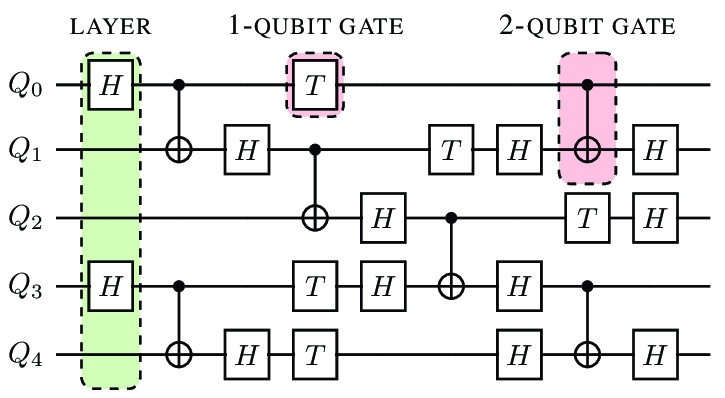

Credit: [Source](Compiler Design for Distributed Quantum Computing - Scientific Figure on ResearchGate. Available from: https://www.researchgate.net/figure/Example-of-a-5-qubit-quantum-circuit-from-18-with-each-horizontal-line-representing_fig1_348696816 [accessed 10 Aug 2024])

i.2.1

In [ ]:
def my_circuit(theta, phi):
    ##################
    # YOUR CODE HERE #
    ##################

    # REORDER THESE 5 GATES TO MATCH THE CIRCUIT IN THE PICTURE

    qml.CNOT(wires=[0, 1])
    qml.RX(theta, wires=2)
    
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[2, 0])
    qml.RY(phi, wires=1)

    # This is the measurement; we return the probabilities of all possible output states
    # You'll learn more about what types of measurements are available in a later node
    return qml.probs(wires=[0, 1, 2])

i.2.2

In [ ]:
# This creates a device with three wires on which PennyLane can run computations
dev = qml.device("default.qubit", wires=3)


def my_circuit(theta, phi, omega):

    ##################
    qml.RX(theta, wires=0)
    qml.RY(phi, wires=1)
    qml.RZ(omega, wires=2)

    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 0])
    ##################

    # IMPLEMENT THE CIRCUIT BY ADDING THE GATES

    # Here are two examples, so you can see the format:
    # qml.CNOT(wires=[0, 1])
    # qml.RX(theta, wires=0)

    return qml.probs(wires=[0, 1, 2])


# This creates a QNode, binding the function and device
my_qnode = qml.QNode(my_circuit, dev)

# We set up some values for the input parameters
theta, phi, omega = 0.1, 0.2, 0.3

# Now we can execute the QNode by calling it like we would a regular function
my_qnode(theta, phi, omega)

i.2.3

In [ ]:
dev = qml.device("default.qubit", wires=3)

##################
# YOUR CODE HERE #
##################

# DECORATE THE FUNCTION BELOW TO TURN IT INTO A QNODE

@qml.qnode(dev)
def my_circuit(theta, phi, omega):
    qml.RX(theta, wires=0)
    qml.RY(phi, wires=1)
    qml.RZ(omega, wires=2)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 0])
    return qml.probs(wires=[0, 1, 2])


theta, phi, omega = 0.1, 0.2, 0.3

##################
my_circuit(theta, phi, omega)
##################

# RUN THE QNODE WITH THE PROVIDED PARAMETERS

i.2.4

In [ ]:
dev = qml.device("default.qubit", wires=3)


@qml.qnode(dev)
def my_circuit(theta, phi, omega):
    qml.RX(theta, wires=0)
    qml.RY(phi, wires=1)
    qml.RZ(omega, wires=2)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 0])
    return qml.probs(wires=[0, 1, 2])


##################
# YOUR CODE HERE #
##################

# FILL IN THE

## Unitary Matrices

A complex-valued matrix $U$ is called a **unitary matrix** if it satisfies the following condition:


$U^\dagger U = U U^\dagger = I$


where:
$U^\dagger  denotes the conjugate transpose (or adjoint) of U .

In other words, a matrix $U$ is unitary if its inverse is equal to its conjugate transpose:

$
U^{-1} = U^\dagger
$

i.3.1

In [ ]:
dev = qml.device("default.qubit", wires=1)

U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)


@qml.qnode(dev)
def apply_u():

    ##################
    qml.QubitUnitary(U, wires=0)
    ##################

    # USE QubitUnitary TO APPLY U TO THE QUBIT

    # Return the state
    return qml.state()

i.3.2

In [ ]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_u_as_rot(phi, theta, omega):

    ##################
    qml.Rot(phi, theta, omega, wires=0)
    ##################

    # APPLY A ROT GATE USING THE PROVIDED INPUT PARAMETERS

    # RETURN THE QUANTUM STATE VECTOR

    return qml.state()


## Single Qubit Gates

the **Pauli X** gate also known as the bit flip operation, or NOT gate, due to its similarity to the Boolean NOT operation. From its action on the basis states |0> and |1>

the **Hadamard gate**. It is typically denoted by $H$ and represented as such in a circuit diagram:

i.4.1



In [ ]:
dev = qml.device("default.qubit", wires=1)

U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)


@qml.qnode(dev)
def varied_initial_state(state):
    """Complete the function such that we can apply the operation U to
    either |0> or |1> depending on the input argument flag.

    Args:
        state (int): Either 0 or 1. If 1, prepare the qubit in state |1>,
            otherwise, leave it in state 0.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """
    ##################
    if state == 1 :
        qml.PauliX(wires = 0)

    qml.QubitUnitary(U, wires = 0)
    ##################

    # KEEP THE QUBIT IN |0> OR CHANGE IT TO |1> DEPENDING ON THE state PARAMETER

    # APPLY U TO THE STATE

    return qml.state()

i.4.2

In [ ]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_hadamard():
    ##################
    qml.Hadamard(wires = 0)
    ##################

    # APPLY THE HADAMARD GATE

    # RETURN THE STATE
    return qml.state()

i.4.3

In [ ]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_hadamard_to_state(state):
    """Complete the function such that we can apply the Hadamard to
    either |0> or |1> depending on the input argument flag.

    Args:
        state (int): Either 0 or 1. If 1, prepare the qubit in state |1>,
            otherwise, leave it in state 0.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """
    ##################
    if state == 1 :
        qml.PauliX(wires = 0)


    qml.Hadamard(wires = 0)
    ##################

    # KEEP THE QUBIT IN |0> OR CHANGE IT TO |1> DEPENDING ON state

    # APPLY THE HADAMARD

    # RETURN THE STATE

    return qml.state()


print(apply_hadamard_to_state(0))
print(apply_hadamard_to_state(1))

i.4.4

In [ ]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_hxh(state):
    if state == 1 :
        qml.PauliX(wires = 0)

    qml.Hadamard(wires = 0)
    qml.PauliX(wires = 0)
    qml.Hadamard(wires = 0)
    
    return qml.state()
# Print your results
print(apply_hxh(0))
print(apply_hxh(1))

the **Pauli Z** gate (denoted Z) flips the phase

The RZ gate, or "**Z rotation**" is a quantum gate that modifies the relative phase between |0> and |1> in a more general way than the Pauli Z gate does, IT is a parametric gate, meaning that its action depends on a **parameter**  (an angle in radians)

i.5.1

In [ ]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_z_to_plus():
    """Write a circuit that applies PauliZ to the |+> state and returns
    the state.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # CREATE THE |+> STATE
    qml.Hadamard(wires = 0)
    
    # APPLY PAULI Z
    qml.PauliZ(wires=0)
    # RETURN THE STATE
    return qml.state()


print(apply_z_to_plus())

i.5.2

In [ ]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def fake_z():
    """Use RZ to produce the same action as Pauli Z on the |+> state.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # CREATE THE |+> STATE
    qml.Hadamard(wires = 0)
    qml.RZ(np.pi, wires = 0)
    # APPLY RZ

    # RETURN THE STATE
    return qml.state()

there is a visualization tool that can be helpful for understanding the structure and behaviour of single-qubit states and operations: the **Bloch sphere.**

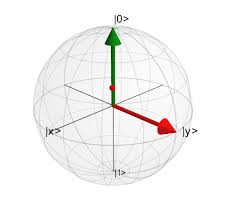


RX and RY perform parametric rotations on their respective axe

i.6.1

In [ ]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_rx_pi(state):
    """Apply an RX gate with an angle of \pi to a particular basis state.

    Args:
        state (int): Either 0 or 1. If 1, initialize the qubit to state |1>
            before applying other operations.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """
    if state == 1:
        qml.PauliX(wires=0)

    ##################
    qml.RX(np.pi, wires = 0)
    ##################

    # APPLY RX(pi) AND RETURN THE STATE

    return qml.state()


print(apply_rx_pi(0))
print(apply_rx_pi(1))

i.6.2

In [ ]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_rx(theta, state):
    """Apply an RX gate with an angle of theta to a particular basis state.

    Args:
        theta (float): A rotation angle.
        state (int): Either 0 or 1. If 1, initialize the qubit to state |1>
            before applying other operations.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """
    if state == 1:
        qml.PauliX(wires=0)

    ##################
    qml.RX(theta, wires = 0)
    ##################

    # APPLY RX(theta) AND RETURN THE STATE

    return qml.state()


# Code for plotting
angles = np.linspace(0, 4 * np.pi, 200)
output_states = np.array([apply_rx(t, 0) for t in angles])

plot = plotter(angles, output_states)

i.6.3

In [ ]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_ry(theta, state):
    """Apply an RY gate with an angle of theta to a particular basis state.

    Args:
        theta (float): A rotation angle.
        state (int): Either 0 or 1. If 1, initialize the qubit to state |1>
            before applying other operations.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """
    if state == 1:
        qml.PauliX(wires=0)

    ##################
    qml.RY(theta, wires = 0)
    ##################

    # APPLY RY(theta) AND RETURN THE STATE

    return qml.state()


# Code for plotting
angles = np.linspace(0, 4 * np.pi, 200)
output_states = np.array([apply_ry(t, 0) for t in angles])

plot = plotter(angles, output_states)

Here are the most used gates, their sign, and their transformation matrix


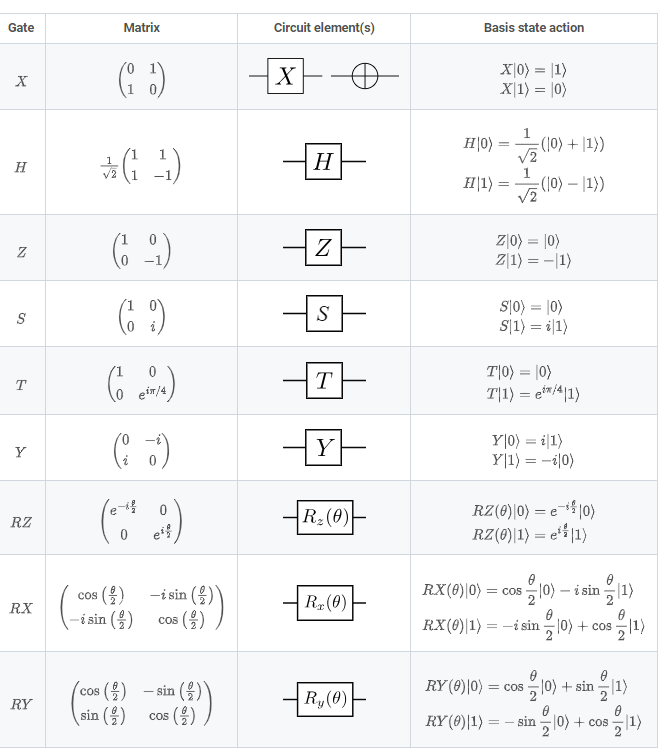

i.9.1

In [ ]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_h_and_measure(state):
    """Complete the function such that we apply the Hadamard gate
    and measure in the computational basis.

    Args:
        state (int): Either 0 or 1. If 1, prepare the qubit in state |1>,
            otherwise leave it in state 0.

    Returns:
        np.array[float]: The measurement outcome probabilities.
    """
    if state == 1:
        qml.PauliX(wires=0)
    qml.Hadamard(wires=0)
    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY HADAMARD AND MEASURE

    return qml.probs(wires=0)


print(apply_h_and_measure(0))
print(apply_h_and_measure(1))

## Multi-Qubit Systems

The multi-qubit computational basis is the set of multi-qubit states containing all possible combinations of |0> and |1>  For example, for the 2-qubit case, we have  |00>|01>|10>|11>


## Entanglment

the controlled-NOT, or CNOT gate is a two-qubit gate that performs an operation (specifically, a Pauli  or "NOT" gate) on one qubit depending on the state of another.
It applies the gate in the wire only if the second qubit is in a specific state

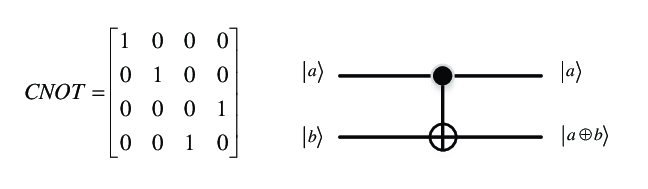

Entanglement can be helpful to know the state of the whole system only by looking at or measuring one qubit

The **controlled-Z** gate is similar in spirit to the controlled-NOT gate. The difference is that rather than applying an X controlled on a qubits state, we apply a Z

The **SWAP gate** is exactly what it sounds like: it exchanges the state of two qubits

we could make controlled operations with any number of qubits. By far the most common such gate is the **Toffoli gate**